# Kaggle: Audio features of 160k+ Spotify songs released in between 1921 and 2020

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
#### Features:
Primary:
- id (Id of track generated by Spotify)
Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

#### Tasks
- Task 1: Predict which decade a music comes from
- Task 2: Predict the popularity of new songs that have been released

In [49]:
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from preprocessing import PreprocessSongsDecadePrediction
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


In [2]:
df_original = pd.read_csv('spotify.csv')

df_original


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [3]:
df = df_original.copy()

As we can see, there data goes from 1921 to 2020.

In [17]:
df['year'].describe()


count    169909.000000
mean       1977.223231
std          25.593168
min        1921.000000
25%        1957.000000
50%        1978.000000
75%        1999.000000
max        2020.000000
Name: year, dtype: float64

 ### Data Preprocessing with visualizations before importing the process to pipeline python file

In [5]:
df_c = df.copy()


In [5]:
# Extract release day of the week

df_c['release_date'] = pd.to_datetime(df_c['release_date'])
df_c['day_of_the_week'] = df_c['release_date'].dt.dayofweek

df_c['day_of_the_week'].value_counts()

1    36774
4    31968
0    28931
2    19453
3    18740
6    17466
5    16577
Name: day_of_the_week, dtype: int64

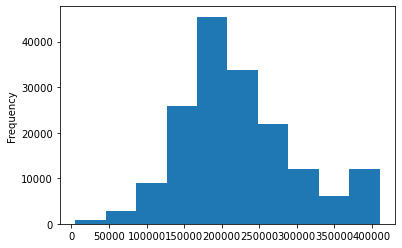

In [6]:
# Outlier - duration

duration_outlier = df_c['duration_ms'].quantile(.95)
df_c['duration_ms_outlier_eliminate'] = df_c['duration_ms'].apply(lambda x: min(x,duration_outlier))
df_c['duration_ms_outlier_eliminate'].plot(kind = 'hist')
pass

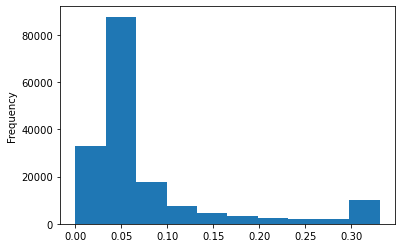

In [7]:
# Outlier - speechiness
speechiness_outlier = df_c['speechiness'].quantile(.95)
df_c['speechiness_outlier_eliminate'] = df_c['speechiness'].apply(lambda x: min(x,speechiness_outlier))
df_c['speechiness_outlier_eliminate'].plot(kind = 'hist')
pass

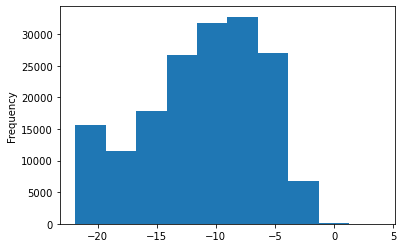

In [8]:
# Outlier - loudness
loudness_outlier = df_c['loudness'].quantile(.05)
df_c['loudness_outlier_eliminate'] = df_c['loudness'].apply(lambda x: max(x,loudness_outlier))
df_c['loudness_outlier_eliminate'].plot(kind = 'hist')
pass

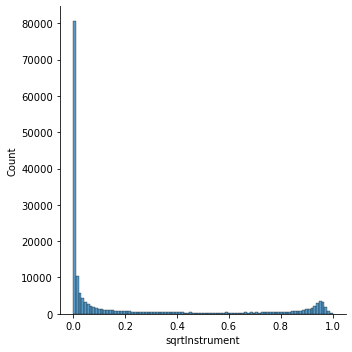

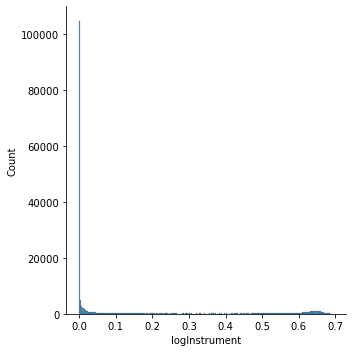

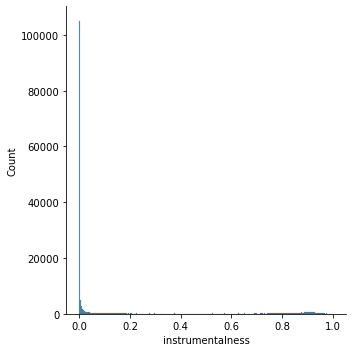

In [9]:
# Skewed - instrument
import math
import seaborn as sns

df_c['sqrtInstrument'] = df_c['instrumentalness'].apply(lambda x: math.sqrt(x))
df_c['logInstrument'] = df_c['instrumentalness'].apply(lambda x: math.log(x + 1))

sns.displot(df_c, x = 'sqrtInstrument',  kind = 'hist')
sns.displot(df_c, x = 'logInstrument',  kind = 'hist')
sns.displot(df_c, x = 'instrumentalness',  kind = 'hist')
pass

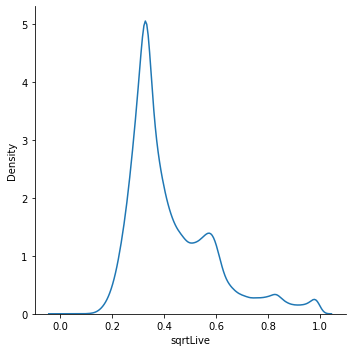

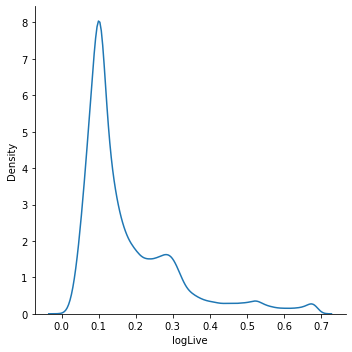

In [10]:
# Skewed - liveness

df_c['sqrtLive'] = df_c['liveness'].apply(lambda x: math.sqrt(x))
df_c['logLive'] = df_c['liveness'].apply(lambda x: math.log(x + 1))

sns.displot(df_c, x = 'sqrtLive',  kind = 'kde')
sns.displot(df_c, x = 'logLive',  kind = 'kde')

pass


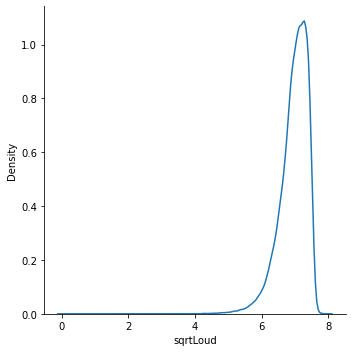

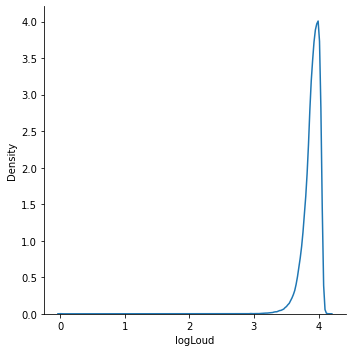

In [11]:
# Skewed - loudness - outlier instead 

df_c['sqrtLoud'] = df_c['loudness'].apply(lambda x: math.sqrt(x + 60))
df_c['logLoud'] = df_c['loudness'].apply(lambda x: math.log(x + 1 + 60))

sns.displot(df_c, x = 'sqrtLoud',  kind = 'kde')
sns.displot(df_c, x = 'logLoud',  kind = 'kde')

pass

### Steps taken
#### 1st
- I first looked at the correlation matrix and found features with high correlation with each other such as: 
    - acousticness 
    - energy
    - loudness
- Since random forest samples some features to build each tree, the information contained in correlated features is twice as much likely to be picked than any other information contained in other features. This could be a problem if you have a large % of correlated features. 
- When the dataset has two (or more) correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others.
- Once one of the correlated features is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature
- Here, I decided to try eliminating “energy” and “loudness”. 

#### 2nd
- The second step I thought was to normalize numeric values. However, once I think about how the splits are done at each node, I realized that this might be redundant too. I then did research online and learned that any algorithm based on recursive partitioning, such as decision trees, and regression trees does not require inputs (features) to be normalized, since it is invariant to monotonic transformations of the features. If we do perform normalization, the result will be same.

#### 3rd
- The third step was the I wanted to extra the day of the week as a numeric number from the release_date. I noticed that the music industry now tends to advise musicians to release new music on Friday to get on top of the Spotify “release radar” playlist, and this would not be a trend back then. So, I thought I might include as a new column.
- Then dropped release_date after the extraction.

#### 4th
- The fourth step was to apply clipping to outliers even though most likely outliers will have a negligible effect for trees because the nodes are determined based on the sample proportions in each split region (and not on their absolute values), I still want to eliminate the effect as much as possible.
- Features that have significant outliers are: 
    - duration_ms
    - speechiness
    - loudness


## Task 1: Predicting the decade the song was released

- Split the data into train and test randomly, and preprocess the year feature accordingly
- Also, **drop popularity** as this is not a fair feature: Since Spotify is relatively new, newer songs have higher popularity

In [4]:
df.describe(include='all')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
count,169909.000000,169909,169909.000000,1.699090e+05,169909.000000,169909.000000,169909,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909,169909.000000,169909,169909.000000,169909.000000,169909.000000,169909.000000
unique,NaN,33375,NaN,NaN,NaN,NaN,169909,NaN,NaN,NaN,NaN,NaN,132940,NaN,10882,NaN,NaN,NaN,NaN
top,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,7arWoSrPeW1uiCGbCu0Igm,NaN,NaN,NaN,NaN,NaN,Summertime,NaN,1945,NaN,NaN,NaN,NaN
freq,NaN,1215,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,62,NaN,1449,NaN,NaN,NaN,NaN
mean,0.493214,NaN,0.538150,2.314062e+05,0.488593,0.084863,NaN,0.161937,5.200519,0.206690,-11.370289,0.708556,NaN,31.556610,NaN,0.094058,116.948017,0.532095,1977.223231
std,0.376627,NaN,0.175346,1.213219e+05,0.267390,0.278679,NaN,0.309329,3.515257,0.176796,5.666765,0.454429,NaN,21.582614,NaN,0.149937,30.726937,0.262408,25.593168
min,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,NaN,0.417000,1.710400e+05,0.263000,0.000000,NaN,0.000000,2.000000,0.098400,-14.470000,0.000000,NaN,12.000000,NaN,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,NaN,0.548000,2.086000e+05,0.481000,0.000000,NaN,0.000204,5.000000,0.135000,-10.474000,1.000000,NaN,33.000000,NaN,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,NaN,0.667000,2.629600e+05,0.710000,0.000000,NaN,0.086800,8.000000,0.263000,-7.118000,1.000000,NaN,48.000000,NaN,0.075400,135.712000,0.749000,1999.000000


In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

def convert_to_decade(year):
    # Count decades starting from 1921. 
    # 1921-1930 will be 0, 1931-1940 will be 1, ... all the way to 2011-2020
    
    year -= 1921 # First extract the initial date
    year //=10   # Then use // to divide by 10 and transform it into an integer (discard the floar part)
    
    # This transformation will make the first decade to be 0, the second to be 1, and the last one to be 9 (10 in total)
    return year
    
def get_decade_Xy(df):
    X = df.drop(['year', 'popularity'], axis=1) 
    y = df['year'].apply(convert_to_decade)
    return X, y

X_train_dec, y_train_dec = get_decade_Xy(df_train)
X_test_dec, y_test_dec = get_decade_Xy(df_test)

In [11]:
from pandas_profiling import ProfileReport

profile = ProfileReport(pd.concat([X_train_dec, y_train_dec], axis=1) , title='Spotify Decade Report', explorative=True)

In [1]:
# Commented out for GitHub 25MB limit
# profile.to_notebook_iframe()


#### Will use Scikit-Learn's pipelines for this project
- To incorporate the custom preprocessing steps into the model, I would need to create a class that follows the framework used for transformations on sklearn. 
- This was done in a separate .py file and imported here
- First create the steps without the pipeline so I can evaluate each step.

In [9]:
# %load_ext autoreload
# %autoreload 2
from preprocessing import PreprocessSongsDecadePrediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

preprocess_decade_step = PreprocessSongsDecadePrediction() # add any initialization parameters here if necessary

# Hyperparameter: max_depth = 10
decision_tree = DecisionTreeClassifier(max_depth = 10) 

X_train_transformed = preprocess_decade_step.fit_transform(X_train_dec)

decision_tree.fit(X_train_transformed, y_train_dec)

y_pred = decision_tree.predict(X_train_transformed)

print("Training metrics:", classification_report(y_train_dec, y_pred))

Training metrics:               precision    recall  f1-score   support

           0       0.59      0.54      0.56      4382
           1       0.54      0.38      0.45      6356
           2       0.46      0.50      0.48     10467
           3       0.36      0.56      0.44     13999
           4       0.41      0.41      0.41     13970
           5       0.33      0.36      0.35     14015
           6       0.42      0.39      0.41     13979
           7       0.41      0.20      0.27     14037
           8       0.42      0.54      0.48     14030
           9       0.64      0.51      0.57     13701

    accuracy                           0.43    118936
   macro avg       0.46      0.44      0.44    118936
weighted avg       0.44      0.43      0.43    118936



#### The model is overfitting the data
- Will improve the model with the pipeline
- But first we can use this model to learn more about the features by plotting the tree (or graphviz below - commented out):

In [35]:
# Plot the tree and analyze the most important features
from sklearn.tree import plot_tree, export_text, export_graphviz

print(export_text(decision_tree, feature_names=list(X_train_transformed.columns)))

|--- acousticness <= 0.67
|   |--- loudness <= -7.65
|   |   |--- explicit <= 0.50
|   |   |   |--- duration_ms <= 180726.50
|   |   |   |   |--- acousticness <= 0.17
|   |   |   |   |   |--- energy <= 0.69
|   |   |   |   |   |   |--- loudness <= -19.40
|   |   |   |   |   |   |   |--- valence <= 0.57
|   |   |   |   |   |   |   |   |--- danceability <= 0.22
|   |   |   |   |   |   |   |   |   |--- duration_ms <= 63616.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- duration_ms >  63616.00
|   |   |   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |   |   |--- danceability >  0.22
|   |   |   |   |   |   |   |   |   |--- speechiness <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- speechiness >  0.04
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- valence >  0.57
|   |   |   |   |   |   |   |   |--- energy <= 0.40
|   |   |  

In [24]:
'''
import graphviz

# DOT data

dot_data = export_graphviz(decision_tree, out_file=None, 
                                 feature_names=list(X_train_transformed.columns),
                                 class_names=[f"{i}-{i+10}" for i in range(1920, 2020, 10)],
                                 filled=True)

# Draw graph
graph = graphviz.Source(dot_data,filename = "testing", directory ="/Users/Documents/Study") 

graph.render(filename = 'testing_render', view = True, cleanup = True, format = 'png')

graph.view()

'''
pass

#### Now use sklearn's Pipeline to implement the preprocessing steps

In [31]:
from sklearn.pipeline import Pipeline


pipe = Pipeline([('preprocess', preprocess_decade_step), ('clf', decision_tree)])

pipe.fit(X_train_dec, y_train_dec)

y_pred = pipe.predict(X_train_dec)

print("Training metrics:", classification_report(y_train_dec, y_pred))

Training metrics:               precision    recall  f1-score   support

           0       0.59      0.54      0.56      4382
           1       0.54      0.38      0.45      6356
           2       0.46      0.50      0.48     10467
           3       0.36      0.56      0.44     13999
           4       0.41      0.41      0.41     13970
           5       0.33      0.36      0.35     14015
           6       0.42      0.39      0.41     13979
           7       0.41      0.20      0.27     14037
           8       0.42      0.54      0.48     14030
           9       0.64      0.51      0.57     13701

    accuracy                           0.43    118936
   macro avg       0.46      0.44      0.44    118936
weighted avg       0.44      0.43      0.43    118936



#### GridSearchCV: cross validation and hyperparameter tuning
- Use GridSearchCV to perform cross validation to evaluate the real performance of our model
- Will use  The GridSearch part allows you to set a list of parameters to test and figure out the best combination of hyperparameters

In [47]:
from sklearn.model_selection import GridSearchCV
'''
param_grid = {
#     'preprocess__YOURPARAM': [...] if you have any preprocessing params, add them here
    'clf__max_depth': [1, 5, 10, 30, 100],
}

'''
gsearch = GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_macro')
gsearch.fit(X_train_dec, y_train_dec)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_dec)

print(classification_report(y_train_dec, y_pred))

Best parameter (CV score=0.396):
{'clf__max_depth': 10}
              precision    recall  f1-score   support

           0       0.59      0.54      0.56      4382
           1       0.54      0.38      0.45      6356
           2       0.46      0.50      0.48     10467
           3       0.36      0.56      0.44     13999
           4       0.41      0.41      0.41     13970
           5       0.33      0.36      0.35     14015
           6       0.42      0.39      0.41     13979
           7       0.41      0.20      0.27     14037
           8       0.42      0.54      0.48     14030
           9       0.64      0.51      0.57     13701

    accuracy                           0.43    118936
   macro avg       0.46      0.44      0.44    118936
weighted avg       0.44      0.43      0.43    118936



#### Results from preprocessing pipelines
- With a max_depth = 10, the original model with the minimal processing returns a F1-score (Marco average) of 0.42
- After the 1st step, the score actually dropped to 0.39. I realized this might be a bad approach if we want to increase the score of the model. So, I comment out these lines of codes and decided not to take this step.
- I decided not to do the 2nd step as mentioned above
- After the 3rd step, the score went up to 0.44, which is a 0.02 increase from the original
- After the 4th step, the score stayed at 0.44


#### Compare other ensemble methods
- Use cross validation GridSearchCV to compare results

In [54]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
pipe_rf = Pipeline([('preprocess', preprocess_decade_step), ('clf', random_forest)])

In [52]:
param_grid = {
#     'preprocess__YOURPARAM': [...] add any preprocessing params here
    'clf__max_depth': [1,5,10]
}


gsearch = GridSearchCV(pipe_rf, param_grid, n_jobs=-1, scoring='f1_macro')
gsearch.fit(X_train_dec, y_train_dec)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_dec)

print(classification_report(y_train_dec, y_pred))

Best parameter (CV score=0.431):
{'clf__max_depth': 10}
              precision    recall  f1-score   support

           0       0.78      0.44      0.56      4382
           1       0.73      0.37      0.49      6356
           2       0.48      0.58      0.52     10467
           3       0.39      0.62      0.48     13999
           4       0.43      0.49      0.46     13970
           5       0.40      0.42      0.41     14015
           6       0.50      0.44      0.47     13979
           7       0.52      0.23      0.32     14037
           8       0.46      0.56      0.50     14030
           9       0.65      0.59      0.62     13701

    accuracy                           0.48    118936
   macro avg       0.53      0.47      0.48    118936
weighted avg       0.50      0.48      0.48    118936



In [56]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
pipe_ada = Pipeline([('preprocess', preprocess_decade_step), ('clf', adaboost)])

param_grid = {
#     'preprocess__YOURPARAM': [...] add any preprocessing params here
}

gsearch = GridSearchCV(pipe_ada, param_grid, n_jobs=-1, scoring='f1_macro')
gsearch.fit(X_train_dec, y_train_dec)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_dec)

print(classification_report(y_train_dec, y_pred))



Best parameter (CV score=0.344):
{}
              precision    recall  f1-score   support

           0       0.32      0.33      0.32      4382
           1       0.43      0.16      0.24      6356
           2       0.31      0.30      0.30     10467
           3       0.32      0.48      0.38     13999
           4       0.35      0.38      0.36     13970
           5       0.34      0.35      0.34     14015
           6       0.38      0.32      0.35     13979
           7       0.30      0.18      0.22     14037
           8       0.39      0.44      0.41     14030
           9       0.50      0.56      0.53     13701

    accuracy                           0.36    118936
   macro avg       0.36      0.35      0.35    118936
weighted avg       0.36      0.36      0.36    118936



In [70]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

gradient = GradientBoostingClassifier()
pipe_grad = Pipeline([('preprocess', preprocess_decade_step), ('clf', gradient)])

param_grid = {
    'clf__loss':['deviance'],
    'clf__learning_rate':[0.1],
    'clf__n_estimators':[100],
    'clf__subsample':[1.0]
}


gsearch = GridSearchCV(pipe_grad, param_grid, n_jobs=-1, scoring='f1_macro')
gsearch.fit(X_train_dec, y_train_dec)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_dec)

print(classification_report(y_train_dec, y_pred))

Best parameter (CV score=0.436):
{'clf__learning_rate': 0.1, 'clf__loss': 'deviance', 'clf__n_estimators': 100, 'clf__subsample': 1.0}
              precision    recall  f1-score   support

           0       0.63      0.50      0.56      4382
           1       0.54      0.37      0.44      6356
           2       0.45      0.49      0.47     10467
           3       0.37      0.54      0.44     13999
           4       0.43      0.46      0.44     13970
           5       0.40      0.41      0.40     14015
           6       0.49      0.41      0.44     13979
           7       0.42      0.29      0.35     14037
           8       0.46      0.52      0.49     14030
           9       0.63      0.58      0.60     13701

    accuracy                           0.46    118936
   macro avg       0.48      0.46      0.46    118936
weighted avg       0.47      0.46      0.46    118936



#### Results
- Here I trained 3 ensemble methods: Random Forest, AdaBoost, and Gradient Boosting
- Random Forest model got the best results out of the 3 after cross-validation
- The F1 Marco score is 0.48, and 0.04 increase from the base tree model. 


#### Report results for the models trained on the test and compare to the cross-validation results.

In [10]:
random_forest = RandomForestClassifier()
pipe_rf = Pipeline([('preprocess', preprocess_decade_step), ('clf', random_forest)])

param_grid = {
#     'preprocess__YOURPARAM': [...] add any preprocessing params here
    'clf__max_depth': [1,5,10]
}


gsearch = GridSearchCV(pipe_rf, param_grid, n_jobs=-1, scoring='f1_macro')
gsearch.fit(X_train_dec, y_train_dec)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_test_dec)

print(classification_report(y_test_dec, y_pred))


Best parameter (CV score=0.430):
{'clf__max_depth': 10}
              precision    recall  f1-score   support

           0       0.71      0.36      0.48      1878
           1       0.65      0.30      0.41      2719
           2       0.43      0.51      0.47      4501
           3       0.35      0.55      0.42      5951
           4       0.39      0.45      0.42      6030
           5       0.35      0.37      0.36      5985
           6       0.45      0.37      0.41      6021
           7       0.42      0.18      0.25      5963
           8       0.43      0.53      0.47      5970
           9       0.62      0.57      0.59      5955

    accuracy                           0.43     50973
   macro avg       0.48      0.42      0.43     50973
weighted avg       0.45      0.43      0.42     50973



In [11]:
adaboost = AdaBoostClassifier()
pipe_ada = Pipeline([('preprocess', preprocess_decade_step), ('clf', adaboost)])

param_grid = {
#     'preprocess__YOURPARAM': [...] add any preprocessing params here
}


gsearch = GridSearchCV(pipe_ada, param_grid, n_jobs=-1, scoring='f1_macro')
gsearch.fit(X_train_dec, y_train_dec)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_test_dec)

print(classification_report(y_test_dec, y_pred))



Best parameter (CV score=0.344):
{}
              precision    recall  f1-score   support

           0       0.34      0.32      0.33      1878
           1       0.42      0.10      0.16      2719
           2       0.33      0.30      0.32      4501
           3       0.32      0.49      0.38      5951
           4       0.35      0.39      0.37      6030
           5       0.33      0.35      0.34      5985
           6       0.37      0.31      0.33      6021
           7       0.28      0.18      0.22      5963
           8       0.38      0.44      0.41      5970
           9       0.52      0.57      0.54      5955

    accuracy                           0.36     50973
   macro avg       0.36      0.34      0.34     50973
weighted avg       0.36      0.36      0.35     50973



In [12]:
gradient = GradientBoostingClassifier()
pipe_grad = Pipeline([('preprocess', preprocess_decade_step), ('clf', gradient)])

param_grid = {
    'clf__loss':['deviance'],
    'clf__learning_rate':[0.1],
    'clf__n_estimators':[100],
    'clf__subsample':[1.0]
}


gsearch = GridSearchCV(pipe_grad, param_grid, n_jobs=-1, scoring='f1_macro')
gsearch.fit(X_train_dec, y_train_dec)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_test_dec)

print(classification_report(y_test_dec, y_pred))

Best parameter (CV score=0.436):
{'clf__learning_rate': 0.1, 'clf__loss': 'deviance', 'clf__n_estimators': 100, 'clf__subsample': 1.0}
              precision    recall  f1-score   support

           0       0.56      0.37      0.45      1878
           1       0.46      0.24      0.32      2719
           2       0.43      0.46      0.44      4501
           3       0.35      0.52      0.42      5951
           4       0.42      0.46      0.44      6030
           5       0.38      0.39      0.38      5985
           6       0.46      0.37      0.41      6021
           7       0.38      0.28      0.32      5963
           8       0.45      0.51      0.48      5970
           9       0.62      0.58      0.60      5955

    accuracy                           0.43     50973
   macro avg       0.45      0.42      0.43     50973
weighted avg       0.44      0.43      0.43     50973



#### Results:
- Random Forest: 0.43
- AdaBoost: 0.34
- Gradient Boosting: 0.43
- So Random Forest is still the best model, but Gradient Boosting is just as good


## Task 2: Predicting new song popularity

- Should take the year the song was created into account

**However**: if we were to add 'year' back as a feature, it helps the performance on the training set but won't help on the test set because the years on the training set are never going to appear again, it is a useless variable.


- When predicting popularity for new songs that will be released, I will have to do a different split where we separate most recent song from older songs. 
- I will also only consider songs starting from the year 2010 since most older songs have very low popularity scores/ - I will try to predict the values for 2020

In [13]:
df = df_original.sort_values(by=['year']) # Order the data by year so the cross validation works

In [14]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
78157,0.9940,['Safiye Ayla'],0.362,182335,0.315,0,4cAxCLjPLojDKuihPNLiCJ,0.636000,2,0.3800,-14.111,1,Perestij,0,1921-04-12,0.0646,91.551,0.2860,1921
78098,0.7660,['Mehmet Kemiksiz'],0.453,337607,0.559,0,107JTiqeqxj5P0ocypagMK,0.010400,9,0.2130,-8.072,1,Eşin Var âşiyâ Var,0,1921,0.0329,156.077,0.4700,1921
78068,0.7320,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,7,1921,0.4150,60.936,0.9630,1921
78069,0.9820,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
78070,0.9410,['Dennis Day'],0.241,196307,0.274,0,4aVy85Y2sxMwIKmAcimHp0,0.000008,0,0.0984,-9.750,0,How Can You Buy Killarny,2,1921,0.0297,90.773,0.2120,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24216,0.3900,"['Carin Leon', 'Espinoza Paz']",0.641,226979,0.334,0,01Bb7kIu9BRyWE0G5A7AmI,0.000000,10,0.2470,-5.961,1,Como Duele Equivocarse,68,2020-03-27,0.0333,78.480,0.6810,2020
24217,0.0409,['LAY'],0.739,199499,0.567,0,453UPGftBZk4BbSwUQTCva,0.000053,10,0.2710,-8.070,0,玉,64,2020-05-19,0.0511,146.037,0.3120,2020
24218,0.2710,['Brandi Carlile'],0.639,213733,0.666,0,0HL3y3bsKSARBSP0qaImwb,0.000000,0,0.1110,-7.775,1,Carried Me With You,66,2020-02-28,0.0636,98.384,0.3720,2020
70580,0.1700,['Jackboy'],0.650,208751,0.540,1,18C0OMcQh37EsWMCzMaget,0.000000,2,0.2100,-9.277,0,Pressure,60,2020-04-24,0.5780,114.083,0.5790,2020


In [15]:
df_train_pop = df[df['year'] <= 2019]
df_train_pop = df_train_pop[df_train_pop['year'] > 2010]
df_test_pop = df[df['year'] > 2019]

In [ ]:
profile = ProfileReport(df_train_pop , title='Spotify Popularity Report', explorative=True)

In [2]:
# Commented out for GitHub 25MB limit
# profile.to_notebook_iframe()

In [17]:
def get_Xy(df):
    X = df.drop(['popularity'], axis=1)
    y = df['popularity']
    
    return X,y

X_train_pop, y_train_pop = get_Xy(df_train_pop)
X_test_pop, y_test_pop = get_Xy(df_test_pop)

In [22]:
X_train_pop.describe(include = 'all')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year
count,17900.000000,17900,17900.000000,1.790000e+04,17900.000000,17900.000000,17900,17900.000000,17900.000000,17900.000000,17900.000000,17900.000000,17900,17900,17900.000000,17900.000000,17900.000000,17900.000000
unique,NaN,7858,NaN,NaN,NaN,NaN,17900,NaN,NaN,NaN,NaN,NaN,15605,2187,NaN,NaN,NaN,NaN
top,NaN,['BTS'],NaN,NaN,NaN,NaN,4CNzuSQoL5jgCxzYmuMvcz,NaN,NaN,NaN,NaN,NaN,Home,2013-01-01,NaN,NaN,NaN,NaN
freq,NaN,103,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,13,490,NaN,NaN,NaN,NaN
mean,0.259279,NaN,0.601418,2.225274e+05,0.625978,0.301117,NaN,0.070023,5.200056,0.187757,-7.459993,0.644693,NaN,NaN,0.102644,120.488536,0.454324,2014.998268
std,0.291235,NaN,0.170522,7.929703e+04,0.220323,0.458756,NaN,0.220332,3.588930,0.152385,4.766434,0.478620,NaN,NaN,0.107492,30.716677,0.238516,2.588928
min,0.000000,NaN,0.000000,3.030100e+04,0.000020,0.000000,NaN,0.000000,0.000000,0.000000,-54.376000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,2011.000000
25%,0.025900,NaN,0.499000,1.881820e+05,0.492000,0.000000,NaN,0.000000,2.000000,0.097500,-8.433000,0.000000,NaN,NaN,0.037100,96.598750,0.268000,2013.000000
50%,0.132000,NaN,0.614000,2.156065e+05,0.655000,0.000000,NaN,0.000002,5.000000,0.124000,-6.351000,1.000000,NaN,NaN,0.054500,120.016000,0.440000,2015.000000
75%,0.416000,NaN,0.726000,2.465840e+05,0.795000,1.000000,NaN,0.000519,8.000000,0.231000,-4.839000,1.000000,NaN,NaN,0.120000,140.096750,0.629000,2017.000000


In [23]:
%load_ext autoreload
%autoreload 2

from sklearn.tree import DecisionTreeRegressor
from preprocessing import PreprocessSongsPopularityPrediction

preprocess_popularity_step = PreprocessSongsPopularityPrediction()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

preprocess_popularity_step = PreprocessSongsPopularityPrediction()
stdscaler = StandardScaler()
normal = Normalizer()

regressor = DecisionTreeRegressor()
param_search = {
    #     'preprocess__YOURPARAM': [...], add any preprocessing params here
    'model__max_depth' : [3, 5, 10],
}
print(gsearch.best_params_)

pipe = Pipeline([('preprocess', preprocess_popularity_step), ('scale',stdscaler), ('model', regressor)]) 
# Create the pipeline here, like what was done for classification


tscv = TimeSeriesSplit(n_splits=5) 
# This will break the data temporally 
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

# Using the temporal splits, can learn the parameters using grid search.
gsearch = GridSearchCV(estimator=pipe, cv=tscv,
                        param_grid=param_search, scoring='r2')

gsearch.fit(X_train_pop, y_train_pop);

print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)

{'model__max_depth': 5}
Best parameter (CV score=-0.141):


#### To better understand the timeseriessplit, uncomment the following code:

In [ ]:
# split_index = 0
# for train_index, val_index in tscv.split(X_train):
#     train = X_train.iloc[train_index]['year']
#     val = X_train.iloc[val_index]['year']
#     print(f"On iteration {split_index}, train goes from years {train.min()} to {train.max()} and validation goes from {val.min()} to {val.max()}")
#     split_index += 1

In [54]:
def print_regression_report(y_true, y_pred):
    print(f"r2 score: {r2_score(y_true, y_pred)}")
    print(f"mse: {mean_squared_error(y_true, y_pred)}")


print_regression_report(y_train_pop, gsearch.predict(X_train_pop))

r2 score: 0.4012348204809304
mse: 46.00741465916632


In [60]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
pipe_rf = Pipeline([('preprocess', preprocess_popularity_step), ('scale',stdscaler), ('reg', random_forest)])

param_grid = {
#     'preprocess__YOURPARAM': [...], add any preprocessing params here
    'reg__max_depth': [1,5,10,15,20]
}


gsearch = GridSearchCV(estimator=pipe_rf, cv=tscv,
                        param_grid=param_grid, scoring='r2',n_jobs=-1)
gsearch.fit(X_train_pop, y_train_pop)

print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_pop)

print_regression_report(y_train_pop, gsearch.predict(X_train_pop))

Best parameter (CV score=-0.110):
{'reg__max_depth': 10}
r2 score: 0.5820933350387811
mse: 32.110760413862295


In [74]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

voting = VotingRegressor([('lr', r1), ('rf', r2),('ada',r3)])
pipe_vt = Pipeline([('preprocess', preprocess_popularity_step), ('scale',stdscaler), ('reg', voting)])

r1 = LinearRegression()
r2 = RandomForestRegressor(max_depth = 10)
r3 = AdaBoostRegressor()

param_grid = {
#     'preprocess__YOURPARAM': [...], add any preprocessing params here 
}


gsearch = GridSearchCV(estimator=pipe_vt, cv=tscv,
                        param_grid=param_grid, scoring='r2',n_jobs=-1)
gsearch.fit(X_train_pop, y_train_pop)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_pop)

print_regression_report(y_train_pop, gsearch.predict(X_train_pop))

Best parameter (CV score=-0.045):
{}
r2 score: 0.4734448065400725
mse: 40.459004556521464


In [63]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
pipe_ada = Pipeline([('preprocess', preprocess_popularity_step), ('scale',stdscaler), ('reg', ada)])

param_grid = {
#     'preprocess__YOURPARAM': [...], add any preprocessing params here
}


gsearch = GridSearchCV(estimator=pipe_ada, cv=tscv,
                        param_grid=param_grid, scoring='r2',n_jobs=-1)
gsearch.fit(X_train_pop, y_train_pop)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_pop)

print_regression_report(y_train_pop, gsearch.predict(X_train_pop))

Best parameter (CV score=-0.063):
{}
r2 score: 0.36633368030868807
mse: 48.68911907837078


## For test data

In [68]:
random_forest = RandomForestRegressor()
pipe_rf = Pipeline([('preprocess', preprocess_popularity_step), ('scale',stdscaler), ('reg', random_forest)])

param_grid = {
#     'preprocess__YOURPARAM': [...], add any preprocessing params here
    'reg__max_depth': [1,5,10,15,20]
}

gsearch = GridSearchCV(estimator=pipe_rf, cv=tscv,
                        param_grid=param_grid, scoring='r2',n_jobs=-1)
gsearch.fit(X_train_pop, y_train_pop)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)

print_regression_report(y_test_pop, gsearch.predict(X_test_pop))

Best parameter (CV score=-0.108):
{'reg__max_depth': 20}
r2 score: -0.11048168105094835
mse: 502.56463965753704


In [75]:
voting = VotingRegressor([('lr', r1), ('rf', r2),('ada',r3)])
pipe_vt = Pipeline([('preprocess', preprocess_popularity_step), ('scale',stdscaler), ('reg', voting)])

r1 = LinearRegression()
r2 = RandomForestRegressor(max_depth = 10)
r3 = AdaBoostRegressor()

param_grid = {
#     'preprocess__YOURPARAM': [...], add any preprocessing params here
#     'reg__estimators': [[('lr', r1), ('rf', r2),('ada',r3)]]
}


gsearch = GridSearchCV(estimator=pipe_vt, cv=tscv,
                        param_grid=param_grid, scoring='r2',n_jobs=-1)
gsearch.fit(X_train_pop, y_train_pop)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_pop)

print_regression_report(y_test_pop, gsearch.predict(X_test_pop))

Best parameter (CV score=-0.040):
{}
r2 score: -0.12514492971567437
mse: 509.2007061565564


In [70]:
ada = AdaBoostRegressor()
pipe_ada = Pipeline([('preprocess', preprocess_popularity_step), ('scale',stdscaler), ('reg', ada)])

param_grid = {
#     'preprocess__YOURPARAM': [...], add any preprocessing params here
}


gsearch = GridSearchCV(estimator=pipe_ada, cv=tscv,
                        param_grid=param_grid, scoring='r2',n_jobs=-1)
gsearch.fit(X_train_pop, y_train_pop)
print("Best parameter (CV score=%0.3f):" % gsearch.best_score_)
print(gsearch.best_params_)
y_pred = gsearch.predict(X_train_pop)

print_regression_report(y_test_pop, gsearch.predict(X_test_pop))

Best parameter (CV score=-0.067):
{}
r2 score: -0.14971157873439989
mse: 520.3187005569724


## TODO - Task 3: Comparing the results of the models

In [ ]:
from decision_tree import DecisionTree

my_tree = DecisionTree()

In [ ]:
my_tree.fit(X_train, y_train)

In [ ]:
from ensemble import BaggingPredictor

my_bagging_predictor = BaggingPredictor(my_tree)

In [ ]:
for train_index, test_index in tscv.split(X_train):
    print(X_train.iloc[train_index]['year'].describe())